<a href="https://colab.research.google.com/github/chxtio/Automate-the-Boring-Stuff-Bot/blob/master/Reddit_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automate the Boring Stuff with Python (ATBS) Bot

<img src="https://miro.medium.com/max/640/1*3PBf6sHuFXsPec47pJ0mXQ.png" alt="logo" align="center" width=300/>
 <img src="https://fiverr-res.cloudinary.com/images/q_auto,f_auto/gigs/152777132/original/5a37f753184b9bdc385da491a5c1a1587613db89/automate-boring-stuff-with-python-bot.png" alt="logo" align="center" width=300/>
 

## Part 1- Webscraping Reddit

### Step 1) Import packages and modules

- Add "shebang line" for running Python script from command line (Linux)
- import built-in and third-party modules

In [ ]:
#!/usr/bin/env python3
import datetime as dt
from time import sleep
import pandas as pd
from IPython.display import display, HTML

- The [Python Reddit API Wrapper (PRAW) module](https://praw.readthedocs.io/en/latest/) will need to be installed before importing it.

In [ ]:
!pip install praw
import praw

### Step 2) Create App

- Log in to Reddit and create app at https://www.reddit.com/prefs/apps/

### Step 3) Register Application with Reddit


  - Obtain OAuth2 credentials to gain access to Reddit's API. See [OAuth2 Quick Start Example](https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example#first-steps)

In [ ]:
from getpass import getpass

user = getpass('Enter user')
password = getpass('Enter password')
app_id = getpass('Enter app_id')
app_secret = getpass('Enter app_secret')

### Step 4) Create Reddit and Subreddit instances

In [ ]:
reddit = praw.Reddit(
    user_agent="ATBS Bot",
    client_id=app_id,
    client_secret=app_secret,
    username=user,
    password=password
)

In [ ]:
subreddit = reddit.subreddit("learnprogramming")

### Step 5) Monitor new submissions to r/learnprogramming

In [ ]:
results_dict = { "id": [],
                 "author": [],
                 "title": [],
                 "score": [],
                 "subreddit": [],
                 "url": [],
                 "url_csv": [],
                 "num_comms": [],
                 "created": [],
                 "body": []
                 }

In [ ]:
for submission in subreddit.top("week", limit = 50):
  sleep(1)
  if str(submission.author) == 'AlSweigart' and submission.title.startswith('"Automate the Boring Stuff with Python" online course is free to sign up'):
    id = submission.id
    author = submission.author
    created = dt.datetime.fromtimestamp(submission.created)
    subreddit = submission.subreddit
    title = submission.title
    body = submission.selftext
    score = submission.score
    num_comms = submission.num_comments
    url = """<a href='{0}' target="_blank">{1}</a>""".format(submission.url, submission.url) #submission.url[8:])
    url_csv = submission.url[8:]
    break

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:
df1 = pd.DataFrame(results_dict, columns=[id, author, title, score, subreddit, url_csv, num_comms, created, body])
html = df1.to_html(escape=False)
HTML(html)

,nrgdjq,AlSweigart,"""Automate the Boring Stuff with Python"" online course is free to sign up for the next few days with code JUN2021FREE",2490,learnprogramming,www.reddit.com/r/learnprogramming/comments/nrgdjq/automate_the_boring_stuff_with_python_online/,143,2021-06-03 23:37:04,"https://inventwithpython.com/automateudemy (This link will automatically redirect you to the latest discount code.) You can also click this link or manually enter the code: JUN2021FREE https://www.udemy.com/course/automate/?couponCode=JUN2021FREE This promo code works until the 4th (I can't extend it past that). Sometimes it takes an hour or so for the code to become active just after I create it, so if it doesn't work, go ahead and try again a while later. I'll change it to JUN2021FREE2 in three days. Udemy has changed their coupon policies, and I'm now only allowed to make 3 coupon codes each month with several restrictions. Hence why each code only lasts 3 days. **I won't be able to make codes after this period**, but I will be making free codes next month. [Meanwhile, the first 15 of the course's 50 videos are free on YouTube.](https://www.youtube.com/watch?v=1F_OgqRuSdI&list=PL0-84-yl1fUnRuXGFe_F7qSH1LEnn9LkW) **Frequently Asked Questions:** (*read this before posting questions*) * This course is for beginners and assumes no previous programming experience, but the second half is useful for experienced programmers who want to learn about various third-party Python modules. * If you don't have time to take the course now, that's fine. Signing up gives you lifetime access so you can work on it at your own pace. * This Udemy course covers roughly the same content as the 1st edition book (the book has a little bit more, but all the basics are covered in the online course), which you can read for free online at https://inventwithpython.com * The 2nd edition of Automate the Boring Stuff with Python is free online: https://automatetheboringstuff.com/2e/ * I do plan on updating the Udemy course for the second edition, but it'll take a while because I have other book projects I'm working on. Expect that update to happen in mid-2021 or late-2021. If you sign up for this Udemy course, you'll get the updated content automatically once I finish it. It won't be a separate course. * It's totally fine to start on the first edition and then read the second edition later. I'll be writing a blog post to guide first edition readers to the parts of the second edition they should read. * I wrote a blog post to cover [what's new in the second edition](https://inventwithpython.com/blog/2019/10/07/whats-new-in-the-2nd-edition-of-automate-the-boring-stuff-with-python/) * **You're not too old to learn to code. You don't need to be ""good at math"" to be good at coding.** * Signing up is the first step. Actually finishing the course is the next. :) [There are several ways to get/stay motivated.](https://www.reddit.com/r/learnprogramming/wiki/faq#wiki_how_can_i_get.2Fstay_motivated_to_learn_programming.3F) I suggest getting a ""gym buddy"" to learn with. Check out /r/ProgrammingBuddies"


## Part 2 - Sending Email

### Step 1) Import Simple Mail Transfer Protocol (SMTP) module

In [ ]:
import smtplib

### Step 2) Create a connection object and connect to SMTP server


In [ ]:
# Pass domain name and port to SMTP function
conn = smtplib.SMTP('smtp.gmail.com', 587)
type(conn)

smtplib.SMTP

### Step 3) Connect to server to send out internet traffic from python

In [ ]:
conn.ehlo()

(250,
 b'smtp.gmail.com at your service, [34.82.177.2]\nSIZE 35882577\n8BITMIME\nSTARTTLS\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')

### Step 4) Start TLS encryption

In [ ]:
conn.starttls()

(220, b'2.0.0 Ready to start TLS')

### Step 5) Login- You may need an app specific password for gmail

- Other issues:
  - Try https://accounts.google.com/b/0/DisplayUnlockCaptcha

In [ ]:
password = getpass('Enter password')

conn.login('autoencoder2021@gmail.com', password)

Enter password··········


(235, b'2.7.0 Accepted')

### Step 6) Parametize email fields using HTML formatting

In [ ]:
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email import encoders

In [ ]:
sent_from = 'autoencoder2021@gmail.com'

to = ['autoencoder2021@gmail.com'] # Add comma-separated email addresses

msg = MIMEMultipart('alternative')
msg['Subject'] = 'Learn Python Without Prior Programming Experience [free online course]'
msg['From'] = sent_from
msg['To'] = ", ".join(to)

html = """
<html>
<head></head>
  <body>
    <p>Al Sweigart's Udemy course, "Automate the Boring Stuff with Python", is free to sign up for the next few days!!! Get it via Reddit here:
      <br/>
      <a href={0}>{1}</a>
    </p>
    <p>This email was automatically generated by a Reddit Bot which scrapes the r/learnprogramming subreddit for this particular coupon (reoccurs monthly). The script lives on a Raspberry Pi and is called by a cron job (Linux) once a day. A walkthrough on how this bot was created: <a href="https://colab.research.google.com/drive/1zKrQgCc2uqI7AhJR5dFNPxJDWhJ1NPCn?usp=sharing">Reddit_Bot.ipynb(Google Colab)</a></p> 
    <p>-Siri</p>
  </body>
</html>
"""

part1= MIMEText(html.format(submission.url, submission.url), 'html')

### Step 7) Email recipient list

In [ ]:
msg.attach(part1)
conn.sendmail(sent_from, to, msg.as_string()) #msg.as_string())
print('Email sent!')

Email sent!


### Step 8) Quit

In [ ]:
conn.quit()

(221, b'2.0.0 closing connection q4sm6564812pgg.0 - gsmtp')

## Part 3- Run bot on Raspberry Pi

Final step- Save the Python script to a Raspberry Pi and use a cron job to run it on a schedule. See [Scheduling tasks with Cron](https://www.raspberrypi.org/documentation/linux/usage/cron.md).

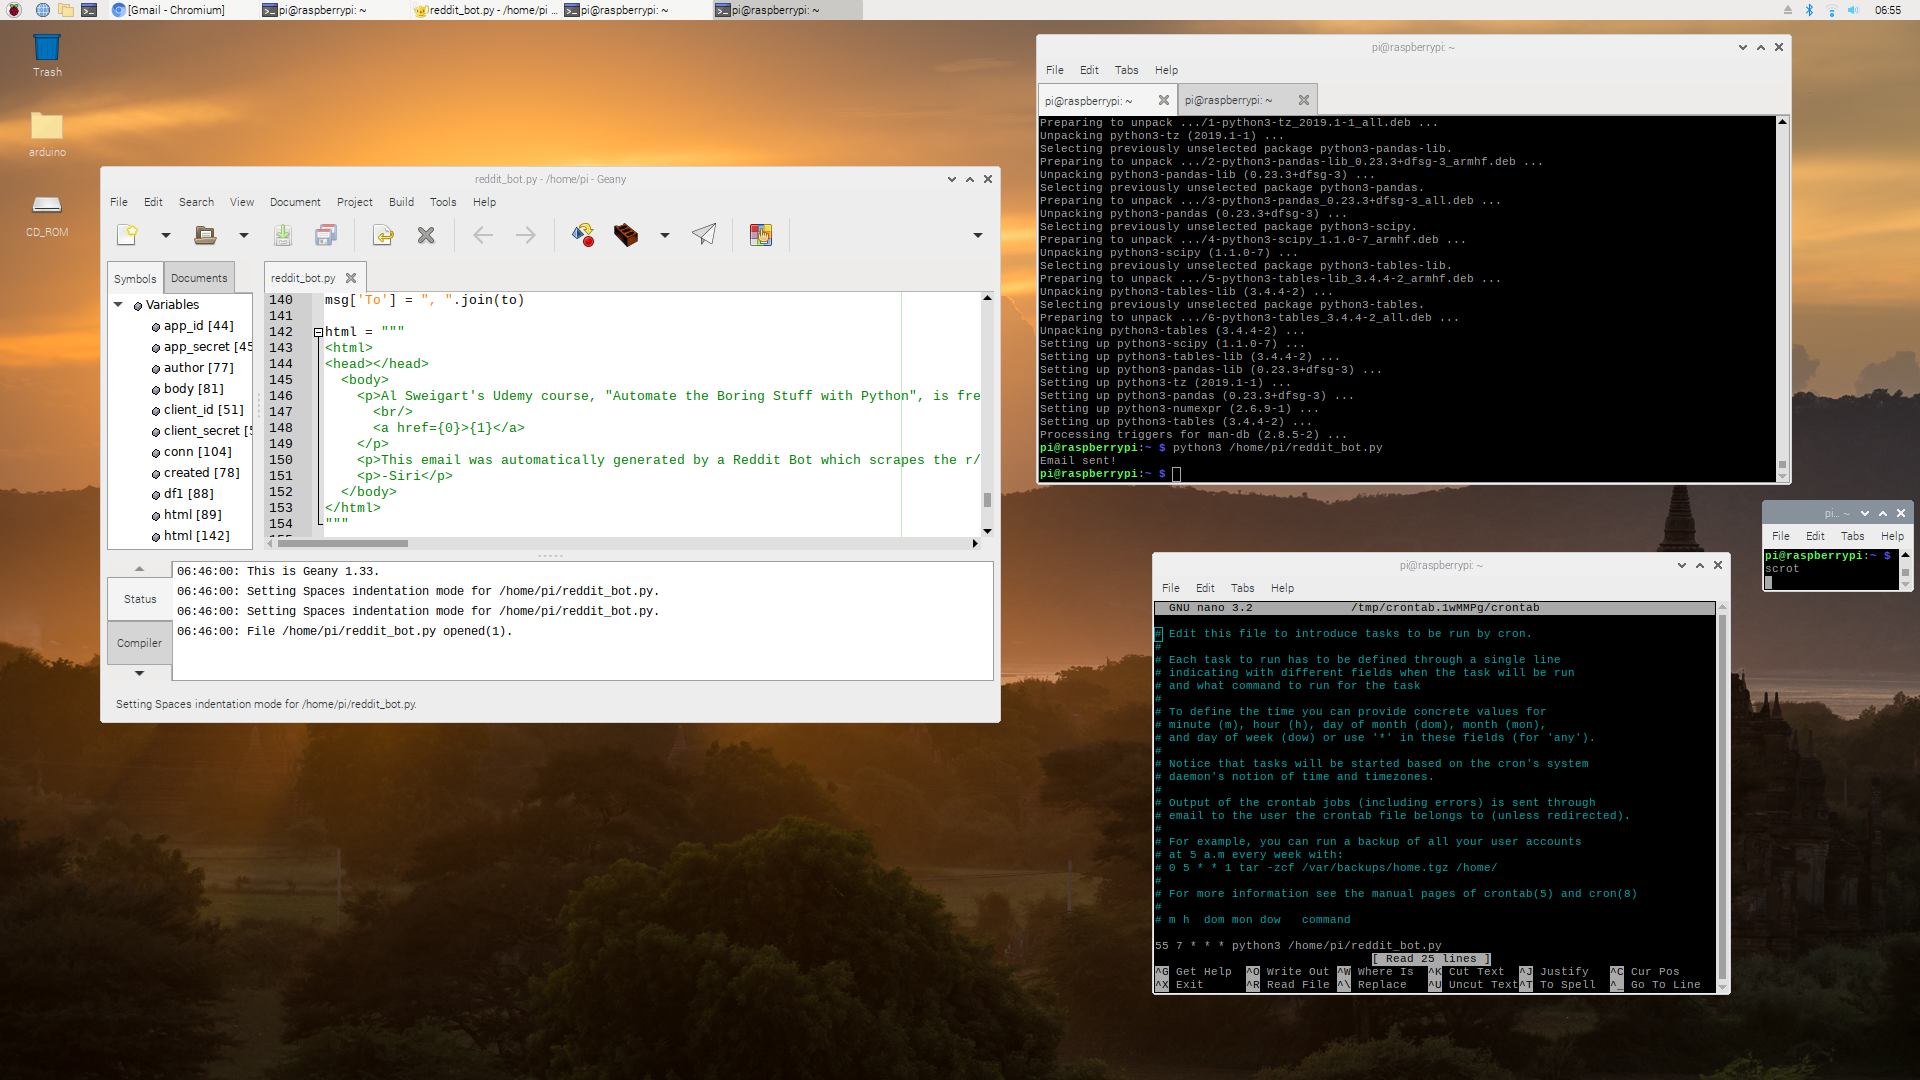